## Downloading datset

In [0]:
! wget -c https://www.dropbox.com/s/bc5e9ew17ldlfhx/part_label_test_128p_v2.tar &>/dev/null

## Downloading the model

In [0]:
! wget -c https://www.dropbox.com/s/38q1cgxt1qu407h/ptlabel_best_model.pth &>/dev/null

## Extracting

In [0]:
%%bash
if [ -z ${TMPDIR} ]; then TMPDIR='/tmp'; else echo "TMPDIR is set to $TMPDIR"; fi
echo $TMPDIR
PT_LABEL=part_label_test_128p_v2.tar
mkdir -p $TMPDIR/eval
tar -C $TMPDIR/eval -xf $PT_LABEL 

/tmp


In [0]:
#! git clone https://github.com/isi-vista/structure_via_consensus.git

In [0]:
%%bash  
wget -c https://www.dropbox.com/s/x055zrg47kmz3x1/structure_via_consensus-master.zip &>/dev/null
unzip structure_via_consensus-master.zip
cp -r structure_via_consensus-master/src_release/ .

Archive:  structure_via_consensus-master.zip
396b3d4513205c2245610c1e30b45bb2bba861bc
   creating: structure_via_consensus-master/
  inflating: structure_via_consensus-master/.gitignore  
  inflating: structure_via_consensus-master/LICENSE  
  inflating: structure_via_consensus-master/README.md  
   creating: structure_via_consensus-master/imgs/
  inflating: structure_via_consensus-master/imgs/teaser.png  
   creating: structure_via_consensus-master/src_release/
  inflating: structure_via_consensus-master/src_release/aug2D.py  
  inflating: structure_via_consensus-master/src_release/conf_matrix.py  
  inflating: structure_via_consensus-master/src_release/data_loader.py  
  inflating: structure_via_consensus-master/src_release/data_tools.py  
   creating: structure_via_consensus-master/src_release/models/
  inflating: structure_via_consensus-master/src_release/models/encoder_decoder_faceoccnet.py  
  inflating: structure_via_consensus-master/src_release/part_label_dataset.py  
  inflati

In [0]:
%%bash
rm -rf structure_via_consensus-master
rm structure_via_consensus-master.zip

# Define and Load Model

In [0]:
import sys
import os
import torch
import torchvision
import numpy as np
import pandas as pd
sys.path.append('src_release')

In [0]:
from data_loader import get_dataloader
from models.encoder_decoder_faceoccnet import FaceOccNet 
from torch_utils import torch_load_weights,evaluation,viz_notebook,plot_confusion_matrix

In [0]:

load_model_path = ("./ptlabel_best_model.pth")
eval_path = os.path.join('/tmp','eval/part_label_test_128p')
model = FaceOccNet(input_channels=3, n_classes=3,is_regularized=True)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

FaceOccNet(
  (model_enc): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ELU(alpha=1.0, inplace=True)
    (3): ReflectionPad2d((1, 1, 1, 1))
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ELU(alpha=1.0, inplace=True)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReflectionPad2d((1, 1, 1, 1))
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ELU(alpha=1.0, inplace=True)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReflectionPad2d((1, 1, 1, 1))
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): ELU(alpha=1.0, inplace=True)
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReflectionPad2d((1, 1, 1, 1))
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (17): ELU(alpha=1.0, inplace=Tru

In [0]:
from torchsummary import summary
print('[Start] Model')
print(model)
print('[End] Model')    
print('[Start] Keras viz')
summary(model,(3,128,128))
print('[End] Keras viz')

[Start] Model
FaceOccNet(
  (model_enc): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ELU(alpha=1.0, inplace=True)
    (3): ReflectionPad2d((1, 1, 1, 1))
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ELU(alpha=1.0, inplace=True)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReflectionPad2d((1, 1, 1, 1))
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ELU(alpha=1.0, inplace=True)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReflectionPad2d((1, 1, 1, 1))
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): ELU(alpha=1.0, inplace=True)
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReflectionPad2d((1, 1, 1, 1))
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (17): ELU(alpha=1.

In [0]:
if os.path.exists(load_model_path) and os.path.isfile(load_model_path):
    _, _ = torch_load_weights(model, None, load_model_path, model_only=True)
    print(f'Loaded model from {load_model_path}')
else:
    print(f'The model does not exist in {load_model_path} or is not a file')

Loaded model from ./ptlabel_best_model.pth


## Data Loader

In [0]:
name2class = {'bg':0,'face':1,'hair':2}
eval_dataloader = get_dataloader( (eval_path,),
                                  batch_size=64,
                                  mode='eval', num_workers=4,
                                  n_classes=3,
                                  dataset_name='PartLabel')

2020-03-18 01:05:40,664 - part_label_dataset - INFO - reading the image files...
2020-03-18 01:05:40,685 - part_label_dataset - INFO - finished initializing the dataloader 927 files.


# 128 pixel rez

## Evaluation

In [0]:
conf_matrix_px_128, conf_matrix_super_px_128, result_128 = evaluation(model,eval_dataloader,name2class,is250=False,string_label='eval',n_classes=3,super_px=True)
assert conf_matrix_px_128.conf_mat.sum()==128*128*927
pd.DataFrame({ k : [v] for k,v in result_128.items()})

2020-03-18 01:05:42,428 - torch_utils - INFO - -------------------eval------------------
eval: 100%|██████████| 15/15 [01:31<00:00,  5.31s/it]
2020-03-18 01:07:14,193 - torch_utils - INFO - eval global_pix_acc_sp:0.968021
2020-03-18 01:07:14,195 - torch_utils - INFO - eval global_pix_acc:0.960568
2020-03-18 01:07:14,198 - torch_utils - INFO - eval avg_recall:0.932218
2020-03-18 01:07:14,199 - torch_utils - INFO - eval----
2020-03-18 01:07:14,200 - torch_utils - INFO - eval bg_recall:0.976437
2020-03-18 01:07:14,201 - torch_utils - INFO - eval bg_precision:0.980109
2020-03-18 01:07:14,202 - torch_utils - INFO - eval bg_iou:0.957464
2020-03-18 01:07:14,204 - torch_utils - INFO - eval----
2020-03-18 01:07:14,205 - torch_utils - INFO - eval bg_f_measure:0.978270
2020-03-18 01:07:14,206 - torch_utils - INFO - eval----
2020-03-18 01:07:14,207 - torch_utils - INFO - eval face_recall:0.955258
2020-03-18 01:07:14,209 - torch_utils - INFO - eval face_precision:0.946464
2020-03-18 01:07:14,210 - 

,pix_acc,spix_acc,bg_recall,bg_precision,bg_IoU,bg_f_measure,face_recall,face_precision,face_IoU,face_f_measure,hair_recall,hair_precision,hair_IoU,hair_f_measure,mean_iou,err_l1_cc
0,0.960568,0.968021,0.976437,0.980109,0.957464,0.97827,0.955258,0.946464,0.906288,0.950841,0.864959,0.860293,0.758427,0.86262,0.87406,3.513484


## Plot Confusion Matrix

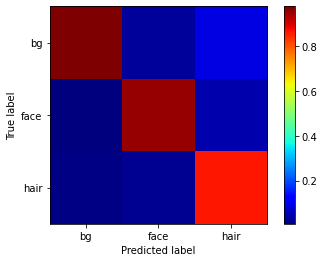

In [0]:
plot_confusion_matrix(conf_matrix_px_128,name2class)

## Visualization of 1st batch

viz: 0it [00:00, ?it/s]

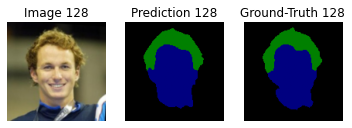

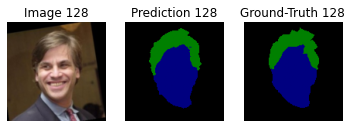

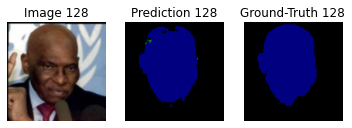

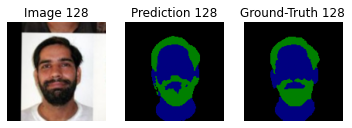

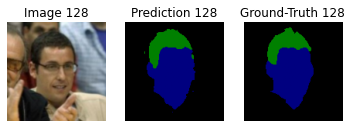

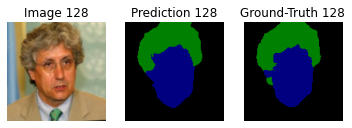

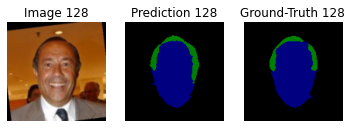

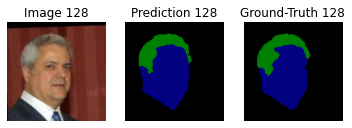

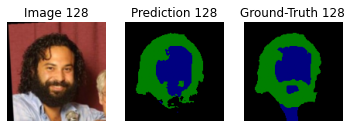

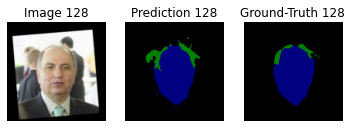

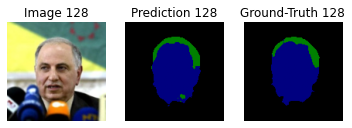

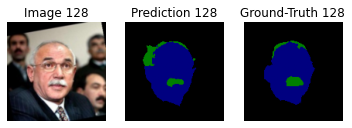

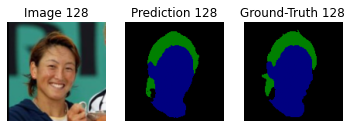

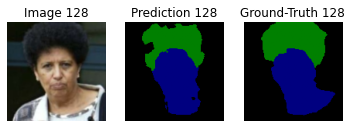

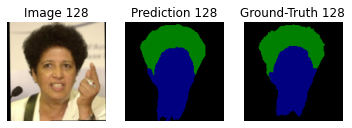

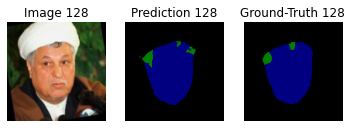

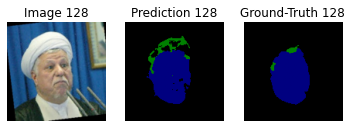

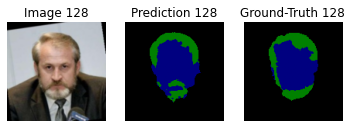

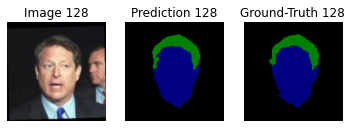

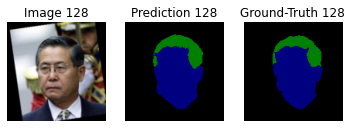

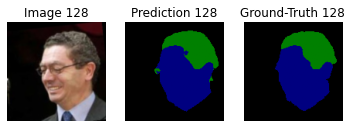

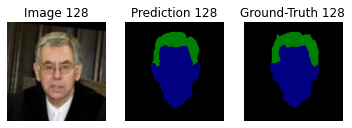

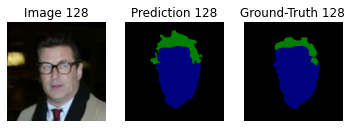

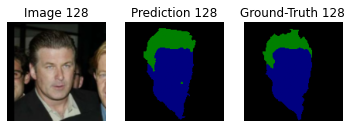

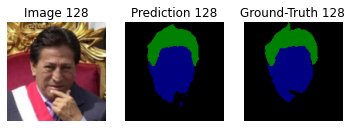

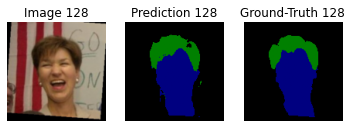

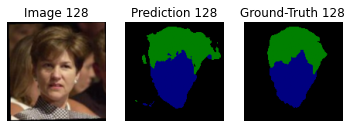

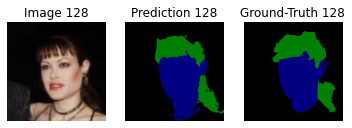

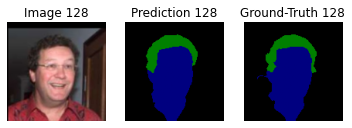

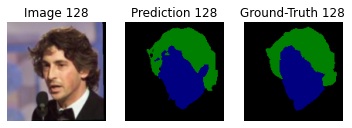

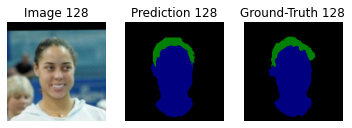

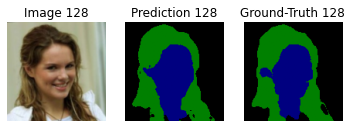

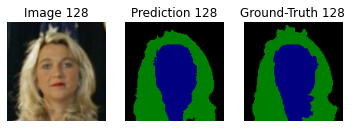

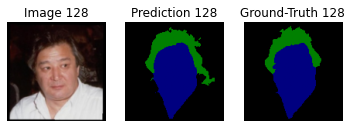

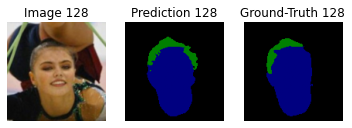

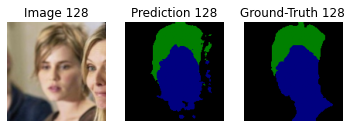

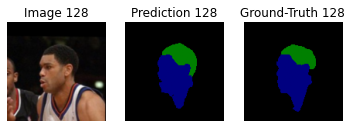

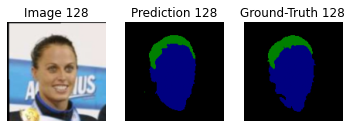

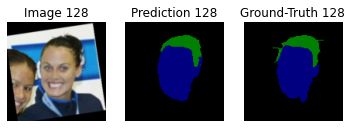

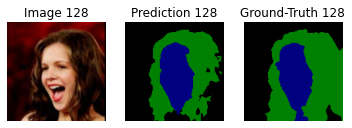

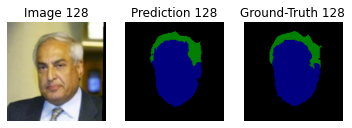

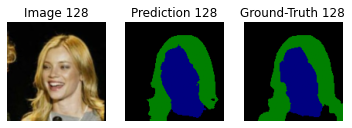

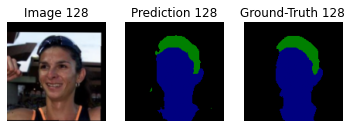

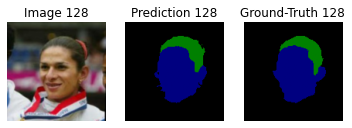

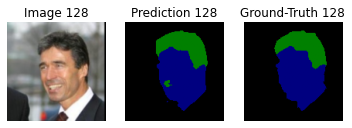

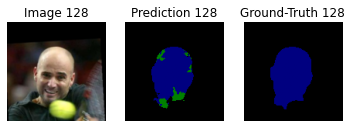

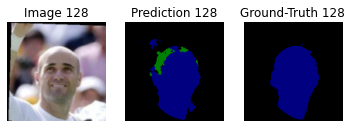

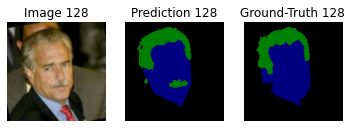

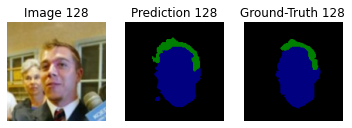

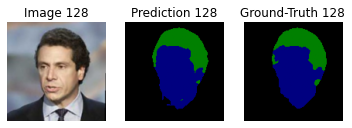

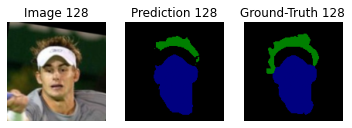

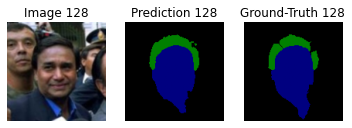

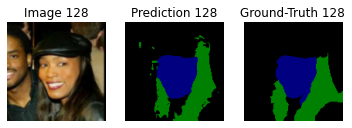

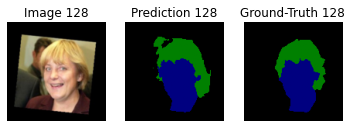

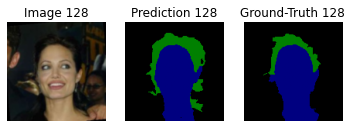

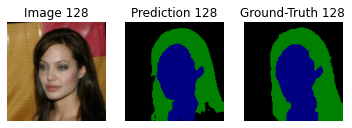

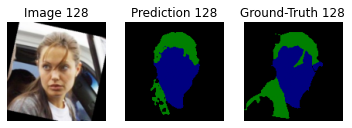

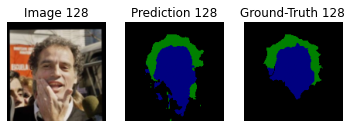

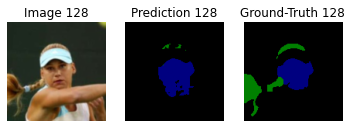

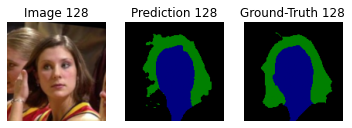

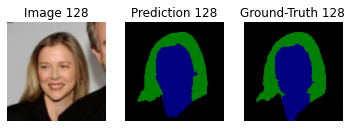

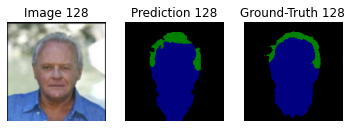

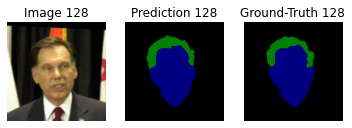

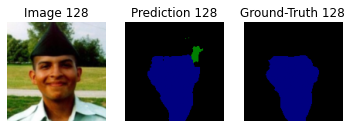

In [0]:
viz_notebook(model,eval_dataloader,device,ibv_stop=0)

# 250 pixel rez

In [0]:
%%bash
wget -c https://www.dropbox.com/s/ylfyupbxg642tnb/part_label_test_250p_v2.tar &>/dev/null

In [0]:
%%bash
if [ -z ${TMPDIR} ]; then TMPDIR='/tmp'; else echo "TMPDIR is set to $TMPDIR"; fi
echo $TMPDIR
PT_LABEL=part_label_test_250p_v2.tar
mkdir -p $TMPDIR/eval-250
tar -C $TMPDIR/eval-250 -xf $PT_LABEL 

/tmp


In [0]:
eval_250_path = os.path.join('/tmp','eval-250/part_label_test_250p')

In [0]:
name2class = {'bg':0,'face':1,'hair':2}
eval_dataloader_250 = get_dataloader( (eval_250_path,),
                                  batch_size=64,
                                  mode='eval', num_workers=0,
                                  n_classes=3,
                                  dataset_name='PartLabel')

2020-03-18 01:10:06,278 - part_label_dataset - WARNING - We are processing part labels for 250p case!
2020-03-18 01:10:06,280 - part_label_dataset - INFO - reading the image files...
2020-03-18 01:10:06,297 - part_label_dataset - INFO - finished initializing the dataloader 927 files.


In [0]:
conf_matrix_px_250, conf_matrix_super_px_250, result_250 = evaluation(model,eval_dataloader_250,name2class,is250=True,string_label='eval',n_classes=3,super_px=True)

2020-03-18 01:10:17,586 - torch_utils - INFO - -------------------eval------------------
eval:   0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
eval: 100%|██████████| 15/15 [05:40<00:00, 19.82s/it]
2020-03-18 01:15:57,715 - torch_utils - INFO - eval global_pix_acc_sp:0.967832
2020-03-18 01:15:57,716 - torch_utils - INFO - eval global_pix_acc:0.958594
2020-03-18 01:15:57,717 - torch_utils - INFO - eval avg_recall:0.929323
2020-03-18 01:15:57,718 - torch_utils - INFO - eval----
2020-03-18 01:15:57,720 - torch_utils - INFO - eval bg_recall:0.975761
2020-03-18 01:15:57,721 - torch_utils - INFO - eval bg_precision:0.978775
2020-03-18 01:15:57,722 - torch_utils - INFO - eval bg_iou:0.955542
2020-03-18 01:15:57,723 - torch_utils - INFO - eval----
2020-03

## Final Result

In [0]:
result = {}
for k,v in result_128.items():
    if k != 'err_l1_cc':
        result[k] = [v*100,result_250[k]*100]
    else:
        result[k] = [v,result_250[k]]
import pandas as pd
pd.DataFrame(result,index=['128p','250p'])

,pix_acc,spix_acc,bg_recall,bg_precision,bg_IoU,bg_f_measure,face_recall,face_precision,face_IoU,face_f_measure,hair_recall,hair_precision,hair_IoU,hair_f_measure,mean_iou,err_l1_cc
128p,96.056839,96.802146,97.643728,98.010945,95.746415,97.826992,95.525846,94.646360,90.628819,95.084069,86.495882,86.029339,75.842694,86.261979,87.405976,3.513484
250p,95.859371,96.783240,97.576120,97.877508,95.554237,97.726582,94.918409,94.572512,90.014987,94.745145,86.302288,85.198947,75.050212,85.747068,86.873145,3.641855


In [0]:
assert conf_matrix_px_250.conf_mat.sum()==250*250*927

## Plot Confusion Matrix

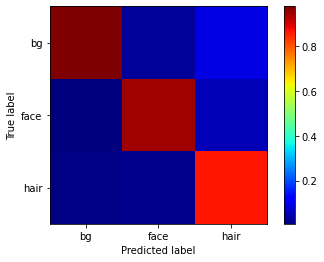

In [0]:
plot_confusion_matrix(conf_matrix_px_250,name2class)